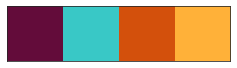

In [1]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.decomposition import PCA

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [20]:
songs1 = pd.read_csv('chinese_songs_audio_features.csv')
songs1.columns

Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [3]:
##Reading unannotated songs
songs = pd.read_csv('indian_songs.csv')
songs.columns

Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [37]:
songs = pd.concat([songs,songs1],ignore_index=True,sort=False)

In [4]:
len(songs)

348

In [5]:
songs.corr()

,Unnamed: 0,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
Unnamed: 0,1.000000,0.249053,-0.247672,-0.243744,-0.022310,-0.119123,-0.039278,-0.160322,-0.011367,-0.041193,-0.357180,0.008711
acousticness,0.249053,1.000000,-0.358820,-0.658424,-0.030176,-0.426438,0.078861,-0.282578,0.010533,-0.153572,-0.411269,-0.069194
danceability,-0.247672,-0.358820,1.000000,0.370488,-0.004407,0.179284,0.017000,0.250975,0.115438,0.035051,0.578045,0.030925
energy,-0.243744,-0.658424,0.370488,1.000000,0.113789,0.736878,-0.141832,0.485315,-0.068715,0.253870,0.599080,0.082244
key,-0.022310,-0.030176,-0.004407,0.113789,1.000000,0.063477,-0.047038,0.104617,0.023220,0.038526,0.169373,-0.004874
loudness,-0.119123,-0.426438,0.179284,0.736878,0.063477,1.000000,-0.169844,0.290750,-0.343728,0.217793,0.418315,0.026559
mode,-0.039278,0.078861,0.017000,-0.141832,-0.047038,-0.169844,1.000000,0.008656,0.001764,-0.019238,-0.029182,-0.092582
speechiness,-0.160322,-0.282578,0.250975,0.485315,0.104617,0.290750,0.008656,1.000000,0.095362,0.233073,0.394356,0.042722
instrumentalness,-0.011367,0.010533,0.115438,-0.068715,0.023220,-0.343728,0.001764,0.095362,1.000000,0.054522,-0.031723,0.069914
liveness,-0.041193,-0.153572,0.035051,0.253870,0.038526,0.217793,-0.019238,0.233073,0.054522,1.000000,0.108835,0.087127


In [63]:
#Copy into another df
songs_features = songs.copy()

#Removing features from the dataset
songs_features = songs_features.drop(['Unnamed: 0','track_name','artist','album','key','mode','instrumentalness','valence'],axis=1)

In [64]:
#Normalize columns which are not normalized using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()


##Normalizing loudness,tempo for unannotated dataset
loudness = songs[['loudness']].values
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs_features['loudness_scaled'] = loudness_scaled

time_signature = songs[['time_signature']].values
time_scaled = min_max_scaler.fit_transform(time_signature)
songs_features['time_scaled'] = time_scaled

In [65]:
#Drop un-normalized columns: loudness and tempo
songs_features = songs_features.drop(['loudness','time_signature','tempo'],axis=1)

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness_scaled'}>],
       [<AxesSubplot:title={'center':'time_scaled'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

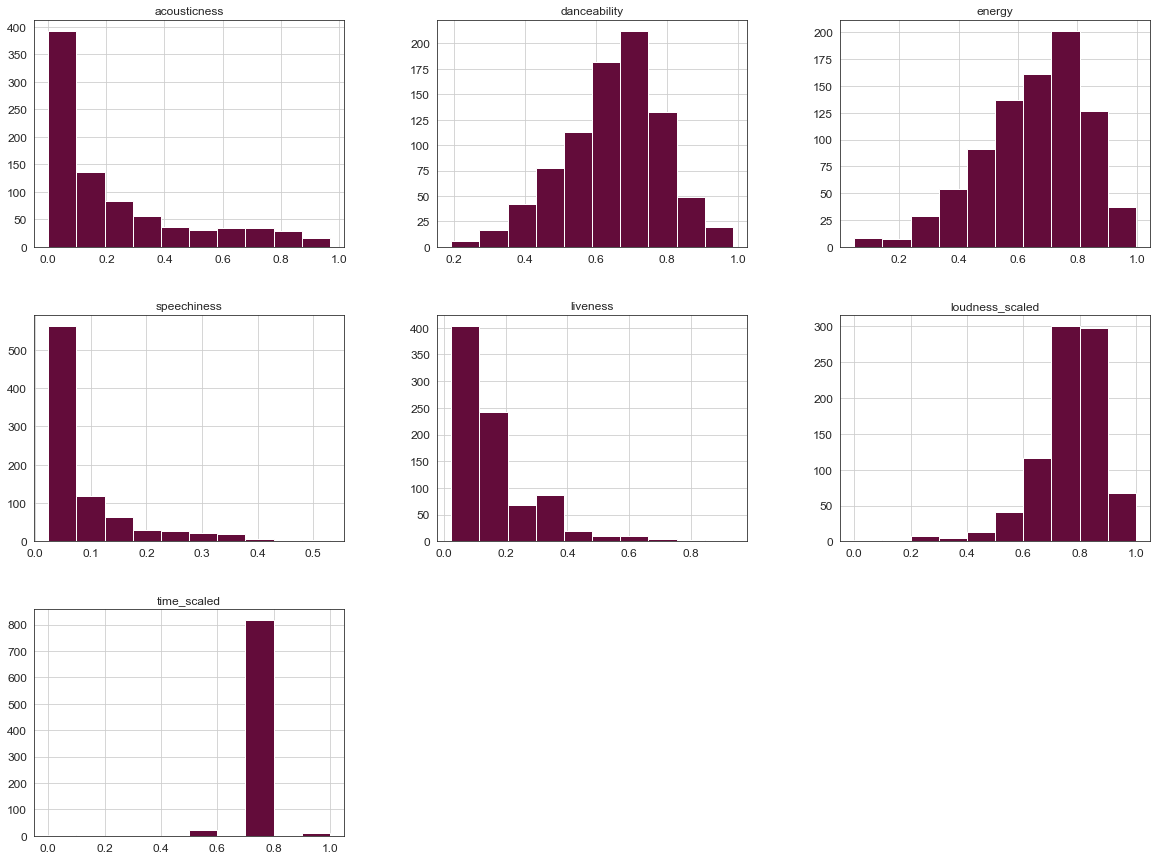

In [66]:
songs_features.hist(bins=10,figsize=(20,15))

In [74]:
##Birch
from sklearn.cluster import Birch

birch = Birch(threshold=0.4, n_clusters=4)
birch.fit(songs_features)

/Users/akankshabansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_birch.py:650: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Birch(n_clusters=4, threshold=0.4)

In [75]:
y_birch = birch.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

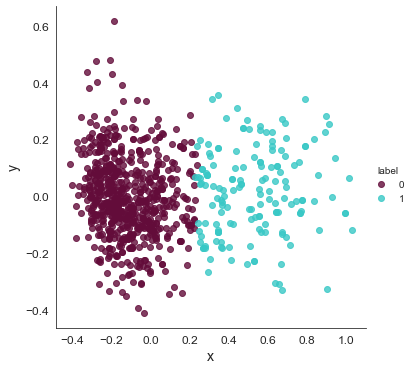

In [76]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_birch
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [70]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

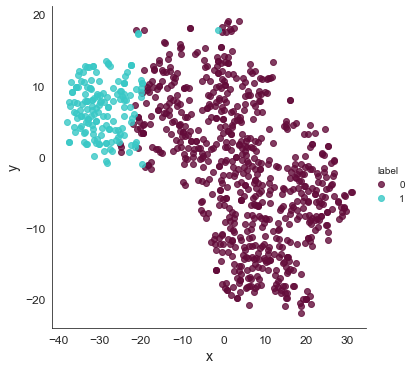

In [71]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_birch
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [72]:
songs['label'] = y_birch

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    695
1    157
Name: label, dtype: int64

In [73]:
label_0 = songs[songs['label'] == 0]
label_0.to_csv('birch_chinese_songs_label_0.csv',encoding='utf-8')

label_1 = songs[songs['label'] == 1]
label_1.to_csv('birch_chinese_songs_label_1.csv',encoding='utf-8')

label_2 = songs[songs['label'] == 2]
label_2.to_csv('birch_chinese_songs_label_2.csv',encoding='utf-8')
